In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.colors as mcolors

from ipynb.fs.full.UtilFunctions import format_season, std
import ipynb.fs.full.UtilCollections as UC

In [2]:
def scatter_plot_division_net_ratings(net_ratings, seasons, division, colors, pos=0):
    plt.figure(figsize=(15, 10), dpi=80)
    i = 0
    for team in division:
        seasons_team = len(net_ratings[team][0])
        total_analyzed_seasons = len(seasons)
        if seasons_team < total_analyzed_seasons:
            for i in range(total_analyzed_seasons - seasons_team):
                net_ratings[team][0].insert(pos, None)
                net_ratings[team][1].insert(pos, None)
        
        made_playoffs = np.array(net_ratings[team][1])
        fcolors = np.where(made_playoffs==True, colors[i], 'none')
        
        plt.grid(lw=0.2)
        plt.scatter(seasons, net_ratings[team][0], s=300, lw=3, facecolors=fcolors, edgecolors=colors[i], label=team)
        
        i += 1
    plt.xticks(seasons[::2])
    plt.yticks(range(-15,16,5))
    handles, labels = plt.gca().get_legend_handles_labels()
    new_handles = [Line2D([0], [0], marker='o', markerfacecolor=x, markeredgecolor=x, ls='') for x in colors]
    plt.legend(new_handles, labels, markerscale=1, edgecolor='black', fontsize=12, loc='upper right', frameon=True, framealpha=1)
    plt.show()

In [3]:
def get_csvs_by_season(season):
    first_year, second_year = format_season(season)
    
    player_df = pd.read_csv("DataCollection/Player_Stats/player_stats_{0}-{1}.csv".format(first_year, second_year))
    team_df = pd.read_csv("DataCollection/Team_Stats/team_stats_{0}-{1}.csv".format(first_year, second_year))
    adv_team_df = pd.read_csv("DataCollection/Advanced_Team_Stats/adv_team_stats_{0}-{1}.csv".format(first_year, second_year))
    
    return player_df, team_df, adv_team_df

In [4]:
player_dfs, team_dfs, adv_team_dfs = [], [], []

for season in UC.SEASONS:
    player_df, team_df, adv_team_df = get_csvs_by_season(season)
    player_dfs.append(player_df)
    team_dfs.append(team_df)
    adv_team_dfs.append(adv_team_df)

In [5]:
adv_team_dfs[20]

,Team,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,...,Off_ORB%,Off_FT/FGA,Def_eFG%,Def_TOV%,Def_DRB%,Def_FT/FGA,Arena,Attend.,Attend./G,Made_Playoffs
0,MIL,29.2,56.0,17.0,57,16,10.08,-0.67,9.41,112.4,...,20.7,0.201,0.489,12.0,81.6,0.178,Fiserv Forum,549036,17711,True
1,BOS,25.3,48.0,24.0,50,22,6.31,-0.47,5.83,113.3,...,23.9,0.207,0.509,13.5,77.4,0.215,TD Garden,610864,19090,True
2,LAC,27.4,49.0,23.0,50,22,6.44,0.21,6.66,113.9,...,23.5,0.233,0.506,12.2,77.6,0.206,STAPLES Center,610176,19068,True
3,TOR,26.6,53.0,19.0,50,22,6.24,-0.26,5.97,111.1,...,21.3,0.210,0.502,14.6,76.7,0.202,Scotiabank Arena,633456,19796,True
4,LAL,29.5,52.0,19.0,48,23,5.79,0.49,6.28,112.0,...,24.5,0.201,0.515,14.1,78.8,0.205,STAPLES Center,588907,18997,True
5,DAL,26.1,43.0,32.0,49,26,4.95,-0.07,4.87,116.7,...,23.2,0.206,0.525,10.6,77.7,0.175,American Airlines Center,682096,20062,True
6,MIA,25.9,44.0,29.0,43,30,2.95,-0.35,2.59,112.5,...,20.3,0.234,0.523,12.6,79.5,0.213,AmericanAirlines Arena,629771,19680,True
7,HOU,29.2,44.0,28.0,42,30,2.96,0.17,3.13,112.9,...,21.0,0.228,0.529,13.7,75.6,0.197,Toyota Center,578458,18077,True
8,UTA,27.3,44.0,28.0,42,30,2.47,0.05,2.52,112.3,...,21.6,0.208,0.518,11.1,78.9,0.185,Vivint Smart Home Arena,567486,18306,True
9,PHI,26.3,43.0,30.0,42,31,2.38,-0.13,2.25,111.3,...,23.9,0.193,0.523,12.5,80.3,0.214,Wells Fargo Center,639491,20629,True


In [6]:
free_throw_rate_diff = []
for df in adv_team_dfs:
    season_rate_diff = {}
    for index, row in df.iterrows():
        diff = row["Off_FT/FGA"] - row["Def_FT/FGA"] 
        
        season_rate_diff[row["Team"]] = (round(diff, 4), row["Made_Playoffs"])

    season_rate_diff = sorted(season_rate_diff.items(), key=lambda x: x[1], reverse=True)
    free_throw_rate_diff.append(season_rate_diff)
    

free_throw_rate_diff[20]

[('OKC', (0.058, True)),
 ('DAL', (0.031, True)),
 ('HOU', (0.031, True)),
 ('CHO', (0.029, False)),
 ('LAC', (0.027, True)),
 ('MIL', (0.023, True)),
 ('UTA', (0.023, True)),
 ('ORL', (0.022, True)),
 ('MIA', (0.021, True)),
 ('SAS', (0.019, False)),
 ('GSW', (0.019, False)),
 ('BRK', (0.012, True)),
 ('TOR', (0.008, True)),
 ('DET', (0.008, False)),
 ('CLE', (0.008, False)),
 ('PHO', (0.005, False)),
 ('LAL', (-0.004, True)),
 ('BOS', (-0.008, True)),
 ('MIN', (-0.009, False)),
 ('POR', (-0.014, True)),
 ('DEN', (-0.015, True)),
 ('WAS', (-0.018, False)),
 ('PHI', (-0.021, True)),
 ('IND', (-0.022, True)),
 ('NOP', (-0.026, False)),
 ('ATL', (-0.029, False)),
 ('MEM', (-0.034, False)),
 ('NYK', (-0.042, False)),
 ('SAC', (-0.048, False)),
 ('CHI', (-0.064, False))]

In [7]:
rating_diff_by_seasons = []
for i in range(len(UC.SEASONS)):
    rating_diff = {}
    
    for index, row in adv_team_dfs[i].iterrows():
        diff = row["ORtg"] - row["DRtg"]
        string_diff = "{:.2f}".format(diff) 
        float_diff = float(string_diff)
        
        rating_diff[row["Team"]] = [float_diff, row["Made_Playoffs"]]
    
    rating_diff = sorted(rating_diff.items(), key=lambda x: x[1][0], reverse=True)
    rating_diff_by_seasons.append(rating_diff)

In [8]:
#Calculate percentage of teams with positive x negative rating that make the playoffs

positive_rating_counter = 0
positive_rating_and_playoffs_counter = 0
negative_rating_counter = 0
negative_rating_and_playoffs_counter = 0
neutral_rating_counter = 0
neutral_rating_and_playoffs_counter = 0


for ratings in rating_diff_by_seasons:
    for rating in ratings:
        if rating[1][0] > 0.0:
            positive_rating_counter += 1
            if rating[1][1]:
                positive_rating_and_playoffs_counter += 1
        elif rating[1][0] == 0.0:
            neutral_rating_counter += 1
            if rating[1][1]:
                neutral_rating_and_playoffs_counter += 1
        else:
            negative_rating_counter +=1
            if rating[1][1]:
                negative_rating_and_playoffs_counter += 1
                
playoff_probability_positive_rating = "{:.2F}".format((positive_rating_and_playoffs_counter / positive_rating_counter) * 100)
playoff_probability_neutral_rating = "{:.2F}".format((neutral_rating_and_playoffs_counter / neutral_rating_counter) * 100)
playoff_probability_negative_rating = "{:.2F}".format((negative_rating_and_playoffs_counter / negative_rating_counter) * 100)

print("% of teams with a positive net rating that make the playoffs:", playoff_probability_positive_rating)
print("% of teams with a neutral net rating that make the playoffs:", playoff_probability_neutral_rating)
print("% of teams with a negative net rating that make the playoffs:", playoff_probability_negative_rating)

% of teams with a positive net rating that make the playoffs: 92.26
% of teams with a neutral net rating that make the playoffs: 40.00
% of teams with a negative net rating that make the playoffs: 13.29


In [9]:
#Calculate average net rating of playoff teams over the last 20 years
#Calculate percentage of teams with above x below average rating that make the playoffs

avg_net_ratings = []

for ratings in rating_diff_by_seasons:
    playoff_counter = 0
    total_rating_playoff_teams = 0.0
    for rating in ratings:
        if rating[1][1]:
            playoff_counter += 1
            total_rating_playoff_teams += rating[1][0]

    avg_playoff_team_net_rating = total_rating_playoff_teams / playoff_counter
    avg_net_ratings.append(float('{:.2f}'.format(avg_playoff_team_net_rating)))
    
print(avg_net_ratings)

[3.49, 3.54, 3.24, 3.2, 3.04, 3.0, 3.14, 3.01, 4.47, 3.73, 4.02, 3.76, 3.76, 3.62, 3.44, 3.42, 3.58, 2.89, 3.21, 3.51, 3.3, 3.44, 3.42]


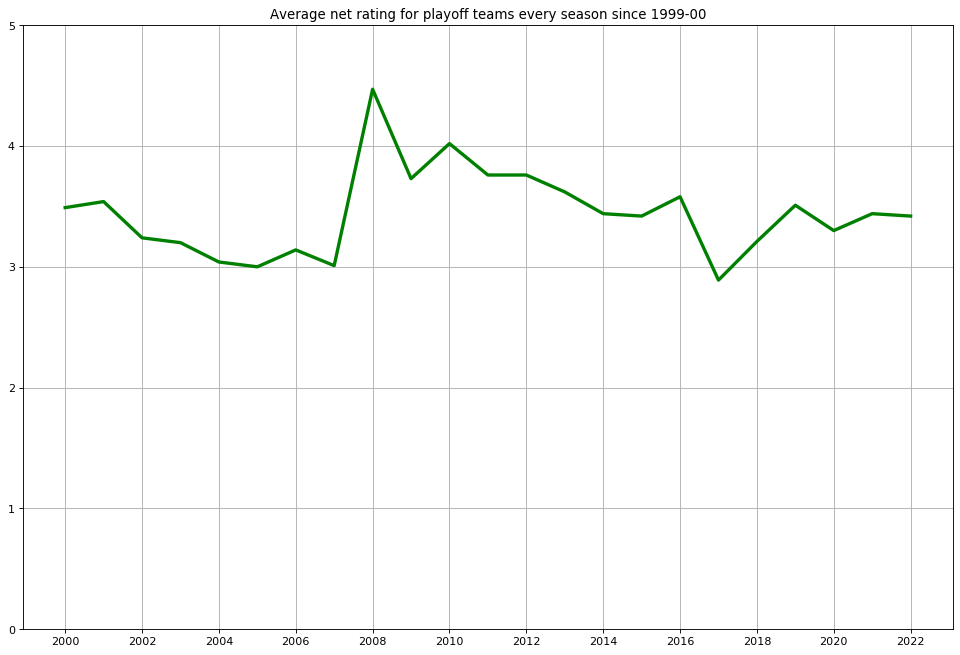

In [10]:
plt.figure(figsize=(15, 10), dpi=80)
plt.grid()
plt.title("Average net rating for playoff teams every season since 1999-00")
plt.plot(UC.SEASONS, avg_net_ratings, lw=3, c='g')
plt.xticks(UC.SEASONS[::2])
plt.yticks(range(6))
plt.show()

In [11]:
#Calculate percentage of teams with above x below average rating that make the playoffs

i = 0
teams_above_avg = []

for ratings in rating_diff_by_seasons:
    above_avg_rating_counter = 0
    above_avg_rating_and_playoffs_counter = 0
    below_avg_rating_counter = 0
    below_avg_rating_and_playoffs_counter = 0
    season_avg = avg_net_ratings[i]
    above_avg_counter = 0
    for rating in ratings:
        if rating[1][0] >= season_avg:
            above_avg_rating_counter += 1
            above_avg_counter += 1
            if rating[1][1]:
                above_avg_rating_and_playoffs_counter += 1
        else:
            below_avg_rating_counter +=1
            if rating[1][1]:
                below_avg_rating_and_playoffs_counter += 1
    i += 1
    teams_above_avg.append(above_avg_counter)
                
above_avg_p = (above_avg_rating_and_playoffs_counter / above_avg_rating_counter) * 100
below_avg_p = (below_avg_rating_and_playoffs_counter / below_avg_rating_counter) * 100

print("% of teams with an above average net rating that make the playoffs:", '{:.2f}'.format(above_avg_p))
print("% of teams with a below average net rating that make the playoffs:", '{:.2f}'.format(below_avg_p))
print(teams_above_avg)

% of teams with an above average net rating that make the playoffs: 100.00
% of teams with a below average net rating that make the playoffs: 41.67
[7, 8, 8, 6, 7, 6, 6, 8, 10, 7, 8, 9, 5, 8, 9, 8, 7, 7, 7, 8, 6, 7, 6]


In [12]:
teams_net_rating = {}

for team in UC.CURRENT_TEAMS:
    teams_net_rating[team] = [[], []]

for team in UC.CURRENT_TEAMS:
    for ratings in rating_diff_by_seasons:
        team_in_rating = list(filter(lambda x: x[0] == team, ratings))
        if team_in_rating:
            net_rating = team_in_rating[0][1][0]
            made_playoffs = team_in_rating[0][1][1]
            teams_net_rating[team][0].append(net_rating)
            teams_net_rating[team][1].append(made_playoffs)

In [13]:
team_playoff_counter = {}

for team in UC.CURRENT_TEAMS:
    team_playoff_counter[team] = 0

for i in range(len(UC.SEASONS)):
    for index, row in adv_team_dfs[i].iterrows():
        if row["Team"] in UC.CURRENT_TEAMS:
            if row["Made_Playoffs"]:
                team_playoff_counter[row["Team"]] += 1
            
team_playoff_counter = sorted(team_playoff_counter.items(), key=lambda x : x[1], reverse=True)

In [14]:
wc_playoff_counter = list(filter(lambda x : x[0] in UC.WESTERN_CONF_TEAMS, team_playoff_counter))

std([p[1] for p in wc_playoff_counter])

3.7735924528226414

In [15]:
ec_playoff_counter = list(filter(lambda x : x[0] in UC.EASTERN_CONF_TEAMS, team_playoff_counter))
std([p[1] for p in ec_playoff_counter])

3.343982987729188

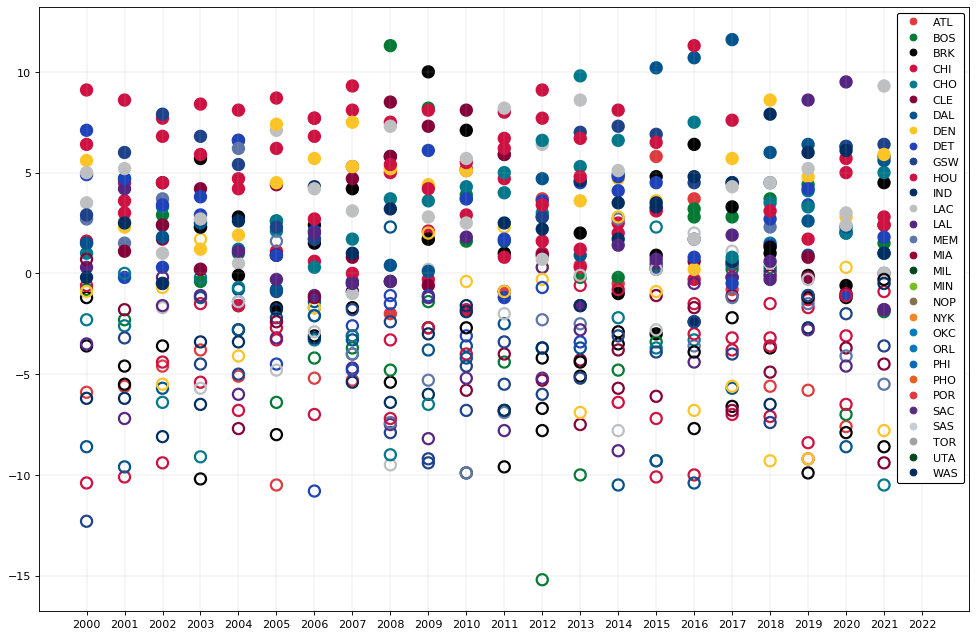

In [16]:
plt.figure(figsize=(15, 10), dpi=80)
i = 0
for team in UC.CURRENT_TEAMS:
    seasons_team = len(teams_net_rating[team][0])
    total_analyzed_seasons = len(UC.SEASONS)
    if seasons_team < total_analyzed_seasons:
        for i in range(total_analyzed_seasons - seasons_team):
            teams_net_rating[team][0].insert(0, None)
            teams_net_rating[team][1].insert(0, None)

    made_playoffs = np.array(teams_net_rating[team][1])
    col = np.where(made_playoffs==True, UC.CURRENT_TEAM_COLORS[i], 'none')
    
    plt.scatter(UC.SEASONS, teams_net_rating[team][0], s=100, edgecolor=UC.CURRENT_TEAM_COLORS[i], facecolor=col, lw = 2, label=team)    
    
    i += 1
    
plt.grid(lw=0.2)
plt.xticks(UC.SEASONS)
handles, labels = plt.gca().get_legend_handles_labels()
new_handles = [Line2D([0], [0], marker='o', markerfacecolor=x, markeredgecolor=x, ls='') for x in UC.CURRENT_TEAM_COLORS]
plt.legend(new_handles, labels, markerscale=1, edgecolor='black', fontsize=10, loc='upper right', frameon=True, framealpha=1)
plt.show()

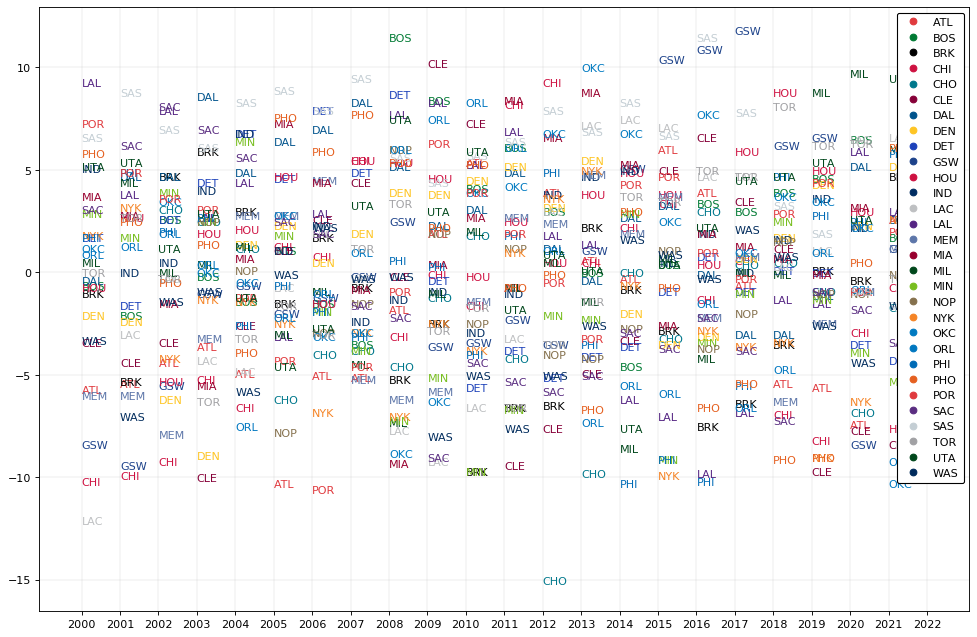

In [17]:
plt.figure(figsize=(15, 10), dpi=80)
i = 0
for team in UC.CURRENT_TEAMS:
    seasons_team = len(teams_net_rating[team][0])
    total_analyzed_seasons = len(UC.SEASONS)
    if seasons_team < total_analyzed_seasons:
        for i in range(total_analyzed_seasons - seasons_team):
            teams_net_rating[team][0].insert(0, None)
            teams_net_rating[team][1].insert(0, None)

    made_playoffs = np.array(teams_net_rating[team][1])
    col = np.where(made_playoffs==True, UC.CURRENT_TEAM_COLORS[i], 'none')
    
    plt.scatter(UC.SEASONS, teams_net_rating[team][0], s=0, label=team)    
    for j in range(len(UC.SEASONS)):
        if teams_net_rating[team][0][j]:
            plt.text(UC.SEASONS[j], teams_net_rating[team][0][j], team, size=10, c=UC.CURRENT_TEAM_COLORS[i])
    
    i += 1
    
plt.grid(lw=0.2)
plt.xticks(UC.SEASONS)
handles, labels = plt.gca().get_legend_handles_labels()
new_handles = [Line2D([0], [0], marker='o', markerfacecolor=x, markeredgecolor=x, ls='') for x in UC.CURRENT_TEAM_COLORS]
plt.legend(new_handles, labels, markerscale=1, edgecolor='black', fontsize=10, loc='upper right', frameon=True, framealpha=1)
plt.show()

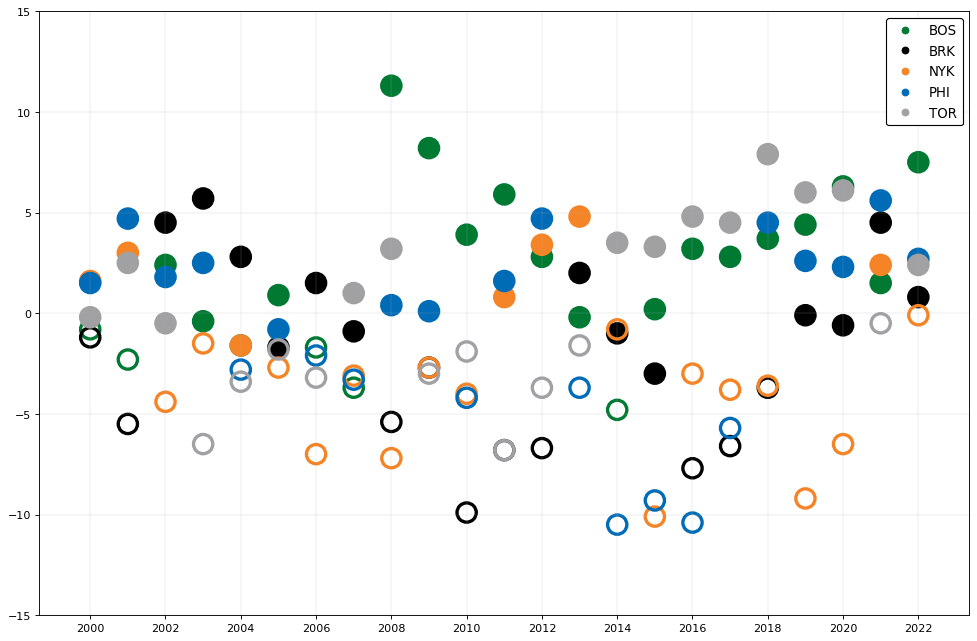

In [18]:
scatter_plot_division_net_ratings(teams_net_rating, UC.SEASONS, UC.ATLANTIC_DIV_TEAMS, UC.ATLANTIC_DIV_TEAMS_COLORS)

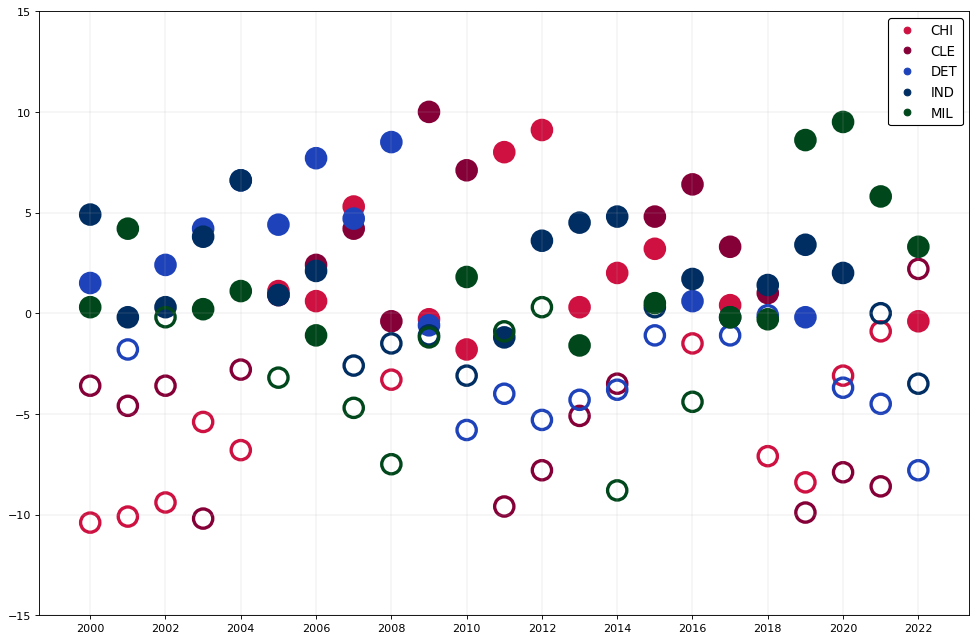

In [19]:
scatter_plot_division_net_ratings(teams_net_rating, UC.SEASONS, UC.CENTRAL_DIV_TEAMS, UC.CENTRAL_DIV_TEAMS_COLORS)

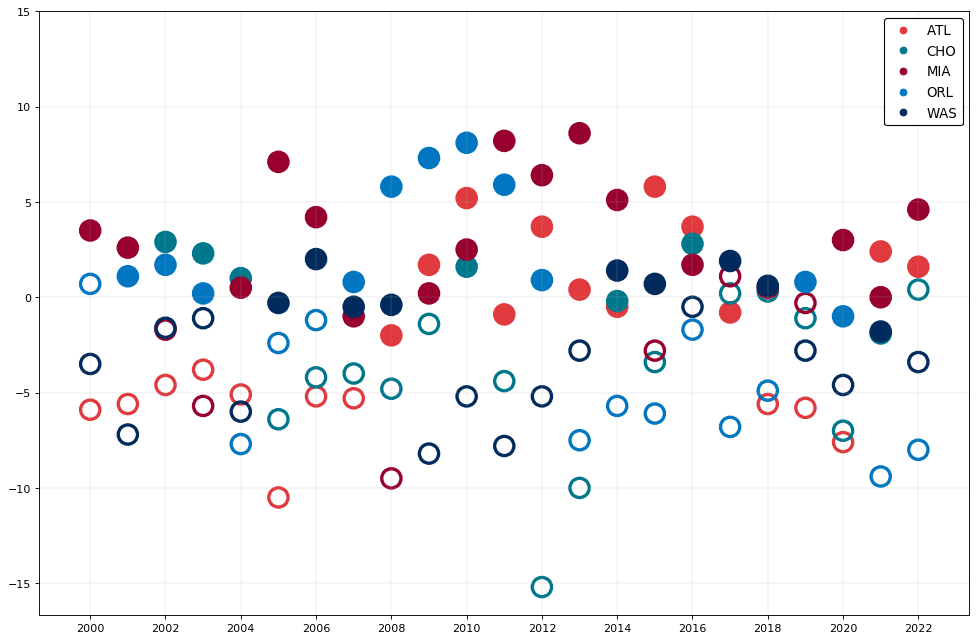

In [20]:
scatter_plot_division_net_ratings(teams_net_rating, UC.SEASONS, UC.SOUTHEAST_DIV_TEAMS, UC.SOUTHEAST_DIV_TEAMS_COLORS)

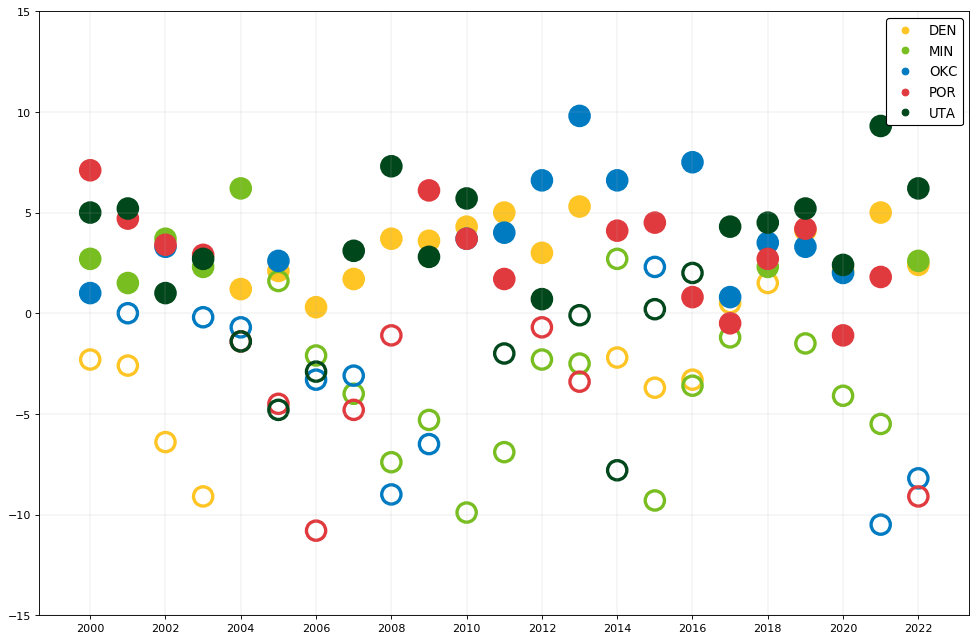

In [21]:
scatter_plot_division_net_ratings(teams_net_rating, UC.SEASONS, UC.NORTHWEST_DIV_TEAMS, UC.NORTHWEST_DIV_TEAMS_COLORS)

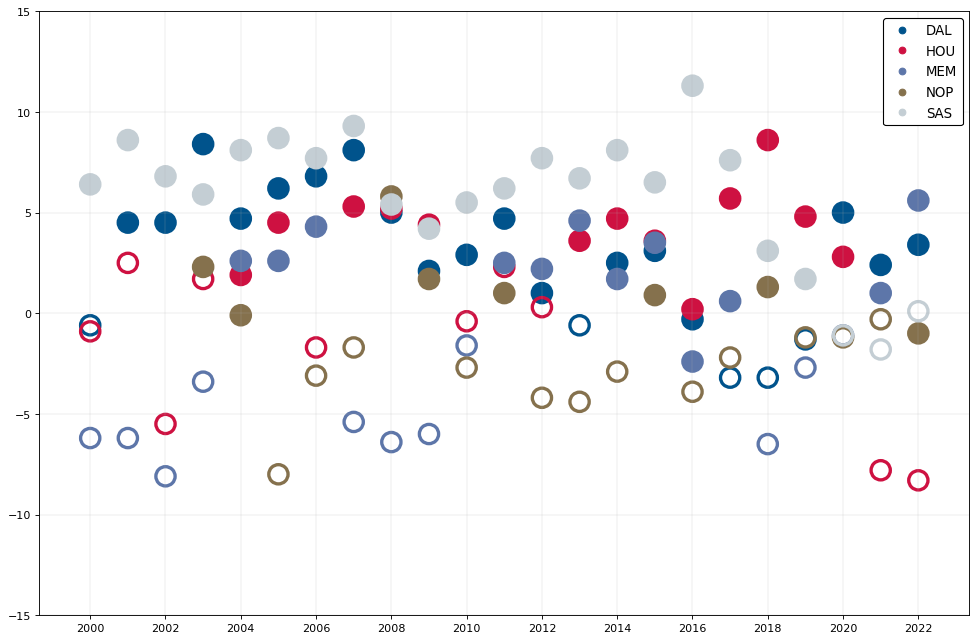

In [22]:
scatter_plot_division_net_ratings(teams_net_rating, UC.SEASONS, UC.PACIFIC_DIV_TEAMS, UC.PACIFIC_DIV_TEAMS_COLORS)

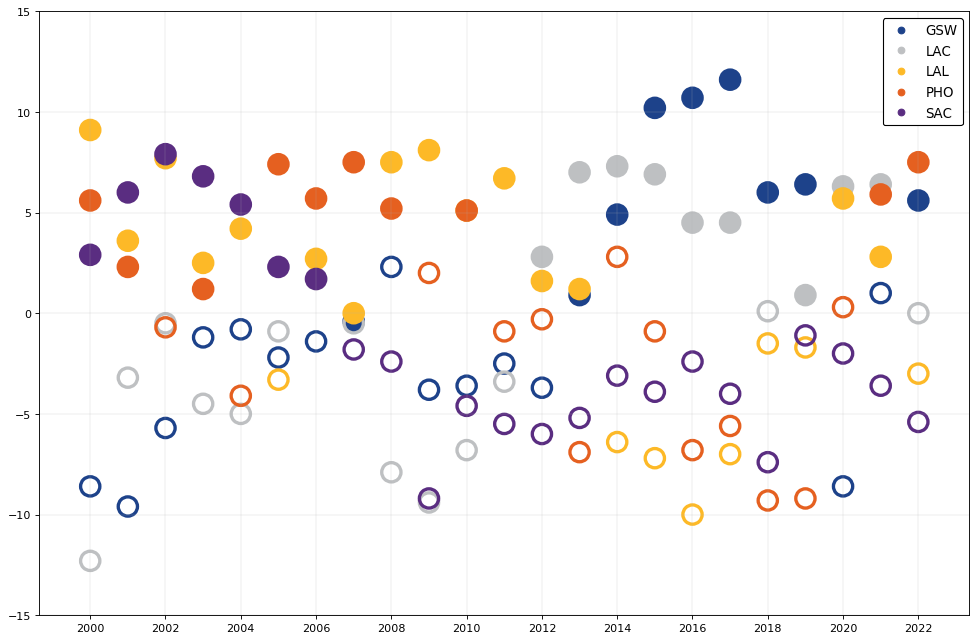

In [23]:
scatter_plot_division_net_ratings(teams_net_rating, UC.SEASONS, UC.SOUTHWEST_DIV_TEAMS, UC.SOUTHWEST_DIV_TEAMS_COLORS)